In [1]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
sys.path.append("/Users/ruby/Astro/rlb_LWA")
import dsa2000_sensitivity
import importlib
importlib.reload(dsa2000_sensitivity)
import scipy.integrate

In [2]:
#antlocs_filepath = "/Users/ruby/Astro/20210226W.cfg"
c = 3e8
min_freq_hz = 0.7e9
max_freq_hz = 2e9
freq_21cm_hz = c/0.21
#antenna_diameter_m = 5
vis_noise = 1.

In [3]:
antpos = dsa2000_sensitivity.get_antpos()

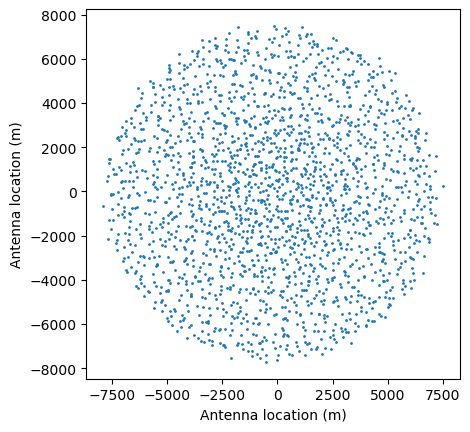

In [4]:
fig, ax = plt.subplots()
ax.scatter(antpos[:,0], antpos[:,1], s=1)
ax.set_aspect(1)
ax.set_xlabel("Antenna location (m)")
ax.set_ylabel("Antenna location (m)")
plt.show()

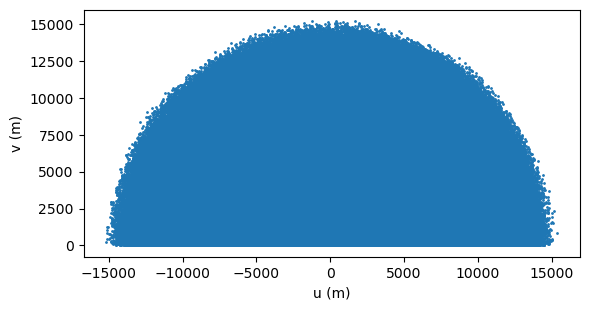

In [5]:
baselines_m = dsa2000_sensitivity.get_baselines(antpos)
fig, ax = plt.subplots()
ax.scatter(baselines_m[:,0], baselines_m[:,1], s=1)
ax.set_aspect(1)
ax.set_xlabel("u (m)")
ax.set_ylabel("v (m)")
plt.show()

In [6]:
field_of_view_deg2 = 10.6
min_freq_hz = 0.7e9
max_freq_hz = c / 0.21
antenna_diameter_m = 5
freq_resolution_hz = 162.5e3
#freq_resolution_hz = 0.05e9
uv_extent = 1000
int_time_s = 1
aperture_efficiency = 0.62
tsys_k = 25
u_coords_wl, v_coords_wl, freq_array_hz, uvf_variance = dsa2000_sensitivity.generate_uvf_variance(
    save_filepath=None,
    field_of_view_deg2=field_of_view_deg2,
    min_freq_hz=min_freq_hz,
    max_freq_hz=max_freq_hz,
    antenna_diameter_m=antenna_diameter_m,
    freq_resolution_hz=freq_resolution_hz,
    uv_extent=uv_extent,
    tsys_k=tsys_k,
    aperture_efficiency=aperture_efficiency,
    int_time_s=int_time_s
)

On frequency channel 1 of 4484
0.661642171091458
On frequency channel 2 of 4484


/Users/ruby/Astro/rlb_LWA/dsa2000_sensitivity.py:184: RuntimeWarning: invalid value encountered in true_divide
  visibility_stddev_mk**2.0 * weights_squared_mat / weights_mat**2.0


0.6613350870186492
On frequency channel 3 of 4484
0.6610282166839141
On frequency channel 4 of 4484
0.6607215598889429
On frequency channel 5 of 4484
0.6604151164356558
On frequency channel 6 of 4484
0.6601088861262022
On frequency channel 7 of 4484
0.6598028687629611
On frequency channel 8 of 4484
0.6594970641485403
On frequency channel 9 of 4484
0.6591914720857767
On frequency channel 10 of 4484
0.6588860923777349
On frequency channel 11 of 4484
0.6585809248277079
On frequency channel 12 of 4484
0.6582759692392164
On frequency channel 13 of 4484
0.6579712254160084
On frequency channel 14 of 4484
0.6576666931620593
On frequency channel 15 of 4484
0.6573623722815707
On frequency channel 16 of 4484
0.6570582625789712
On frequency channel 17 of 4484
0.656754363858915
On frequency channel 18 of 4484
0.6564506759262826
On frequency channel 19 of 4484
0.65614719858618
On frequency channel 20 of 4484
0.6558439316439378
On frequency channel 21 of 4484
0.6555408749051124
On frequency channel 2

KeyboardInterrupt: 

NameError: name 'uvf_variance' is not defined

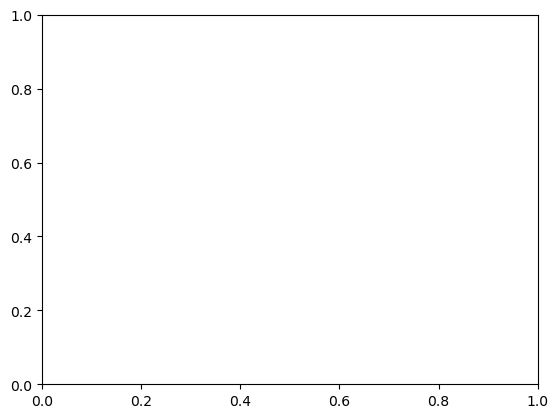

In [7]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    uvf_variance[:,:,3].T,
    origin="lower",
    interpolation="none",
    extent=[np.min(u_coords_wl), np.max(u_coords_wl), np.min(v_coords_wl), np.max(v_coords_wl)],
    vmin=0,
    cmap=use_cmap,
)
ax.set_xlabel("u (wavelengths)")
ax.set_ylabel("v (wavelengths)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("Variance (mK^2)", rotation=270, labelpad=15)
plt.show()

NameError: name 'uvf_variance' is not defined

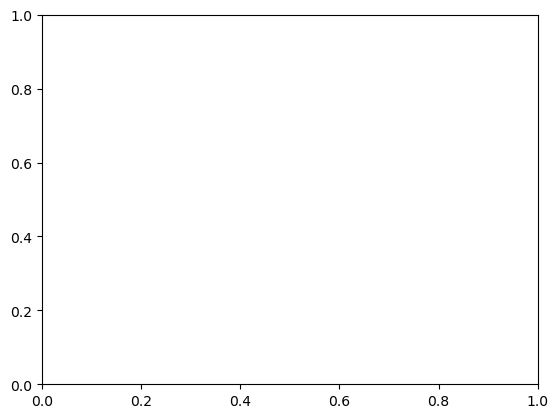

In [8]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    np.isfinite(uvf_variance[:,:,3].T),
    origin="lower",
    interpolation="none",
    extent=[np.min(u_coords_wl), np.max(u_coords_wl), np.min(v_coords_wl), np.max(v_coords_wl)],
    vmin=0,
    cmap=use_cmap,
)
ax.set_xlabel("u (wavelengths)")
ax.set_ylabel("v (wavelengths)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("Variance (mK^2)", rotation=270, labelpad=15)
plt.show()

In [9]:
delay_array_s, uvn_variance = dsa2000_sensitivity.generate_uvn_variance_simple_ft(freq_array_hz, freq_resolution_hz, uvf_variance)

NameError: name 'freq_array_hz' is not defined

NameError: name 'uvn_variance' is not defined

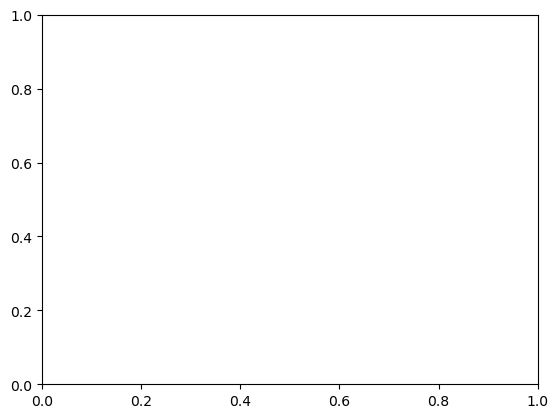

In [10]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    uvn_variance[:,:,0].T,
    origin="lower",
    interpolation="none",
    extent=[np.min(u_coords_wl), np.max(u_coords_wl), np.min(v_coords_wl), np.max(v_coords_wl)],
    vmin=0,
    cmap=use_cmap,
)
ax.set_xlabel("u (wavelengths)")
ax.set_ylabel("v (wavelengths)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("Variance (mK^2)", rotation=270, labelpad=15)
plt.show()

In [11]:
uvn_variance_masked = dsa2000_sensitivity.mask_foregrounds(
    delay_array_s,
    uvn_variance,
    max_delay=2e-9,
)

NameError: name 'delay_array_s' is not defined

In [ ]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    uvn_variance_masked[:,:,0].T,
    origin="lower",
    interpolation="none",
    extent=[np.min(u_coords_wl), np.max(u_coords_wl), np.min(v_coords_wl), np.max(v_coords_wl)],
    vmin=0,
    cmap=use_cmap,
)
ax.set_xlabel("u (wavelengths)")
ax.set_ylabel("v (wavelengths)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("Variance (mK^2)", rotation=270, labelpad=15)
plt.show()

In [ ]:
kx, ky, kz = dsa2000_sensitivity.uvf_to_cosmology_axis_transform(
    u_coords_wl,
    v_coords_wl,
    freq_array_hz,
    freq_resolution_hz,
)

In [ ]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    uvn_variance_masked[:,:,0].T,
    origin="lower",
    interpolation="none",
    extent=[np.min(kx), np.max(kx), np.min(ky), np.max(ky)],
    vmin=0,
    cmap=use_cmap,
)
ax.set_xlabel("kx (h/Mpc)")
ax.set_ylabel("ky (h/Mpc)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("Variance (mK^2)", rotation=270, labelpad=15)
plt.show()

In [ ]:
bin_centers, binned_ps_variance = dsa2000_sensitivity.get_binned_kcube_variance(
    kx,
    ky,
    kz,
    uvn_variance_masked,
    min_k=None,
    max_k=None,
    n_kbins=10,
)

In [ ]:
plt.scatter(bin_centers, binned_ps_variance, s=1)
plt.xscale("log")

In [ ]:
print(bin_centers)
print(np.sqrt(binned_ps_variance))

In [ ]:
plt.scatter(bin_centers, np.sqrt(binned_ps_variance), s=1)
plt.xscale("log")

In [ ]:
visibility_stddev = dsa2000_sensitivity.get_visibility_stddev(
    freq_hz=freq_21cm_hz,
    tsys_k=tsys_k,
    aperture_efficiency=aperture_efficiency,
    antenna_diameter_m=antenna_diameter_m,
    freq_resolution_hz=freq_resolution_hz,
    int_time_s=int_time_s,
)

In [ ]:
print(visibility_stddev)

In [ ]:
uvf_variance_combined = 

In [2]:
#f = open("/Users/ruby/Downloads/camb_61237059_matterpower_z0.67.dat", "r")
f = open("/Users/ruby/Astro/dsa2000_sensitivity_analysis/camb_49591724_matterpower_z0.5.dat", "r")
file_data = f.readlines()
f.close()

In [3]:
file_data[0].split()[1]

'0.34668E+03'

In [4]:
k = []
power = []
for line in file_data:
    k.append(float(line.split()[0]))
    power.append(float(line.split()[1]))

(0.01, 1.0)

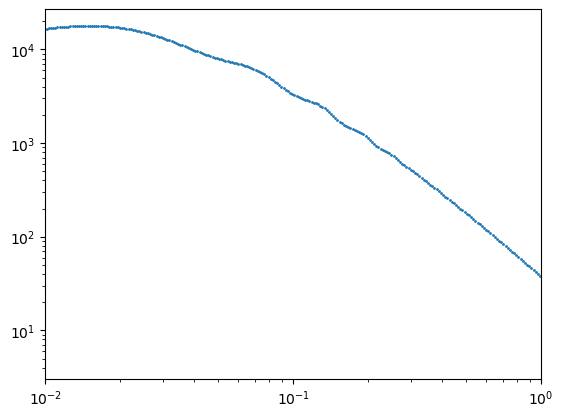

In [5]:
plt.scatter(k, power, s=1)
plt.yscale("log")
plt.xscale("log")
plt.xlim([1e-2,1e0])

In [6]:
#power_new = dsa2000_sensitivity.matter_ps_to_21cm_ps_conversion(np.array(k), np.array(power), 0.67)
power_new = dsa2000_sensitivity.matter_ps_to_21cm_ps_conversion(np.array(k), np.array(power), 0.5)

(0.01, 7)

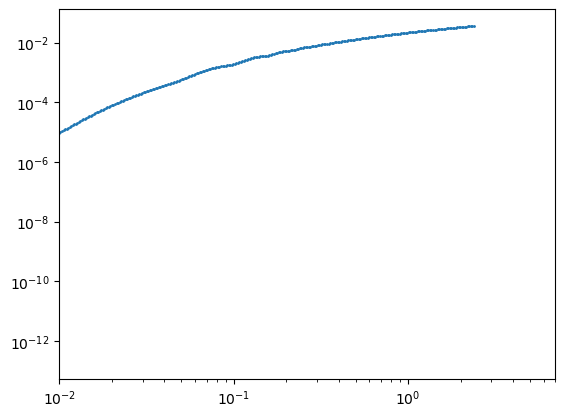

In [7]:
plt.scatter(k, power_new, s=1)
plt.yscale("log")
plt.xscale("log")
plt.xlim([1e-2,7])
#plt.ylim(1e-5,2e-2)

In [ ]:
ps_model, model_k_axis = dsa2000_sensitivity.get_ps_model_Paul2023(z=0.32)

In [ ]:
plt.scatter(model_k_axis, ps_model, s=1)
plt.scatter(k, power_new, s=1)
plt.yscale("log")
plt.xscale("log")
#plt.xlim([1e-2,1e0])
#plt.ylim(1e-5,2e-2)

In [8]:
nsamples, bin_centers, binned_ps_variance, nsamples_2d, bin_centers_kperp, bin_centers_kpar, binned_ps_variance_2d = dsa2000_sensitivity.delay_ps_sensitivity_analysis()

In [9]:
print(bin_centers_kpar)

[0.06005936 0.18017807 0.30029678 0.42041549 0.5405342  0.66065292
 0.78077163 0.90089034 1.02100905 1.14112776 1.26124648 1.38136519
 1.5014839  1.62160261 1.74172132 1.86184004 1.98195875 2.10207746
 2.22219617 2.34231488 2.4624336  2.58255231 2.70267102 2.82278973
 2.94290844 3.06302716 3.18314587 3.30326458 3.42338329 3.543502
 3.66362072 3.78373943 3.90385814 4.02397685 4.14409556 4.26421428
 4.38433299 4.5044517  4.62457041 4.74468912 4.86480784 4.98492655
 5.10504526 5.22516397 5.34528268 5.4654014  5.58552011 5.70563882
 5.82575753 5.94587624]


In [10]:
print(binned_ps_variance)

[2.51841624e-04 3.44112025e-05 1.19640371e-05 6.02937846e-06
 3.57250888e-06 2.31592589e-06 1.58099722e-06 1.15552928e-06
 8.88106482e-07 7.00114978e-07 5.57726200e-07 4.67387745e-07
 3.86764130e-07 3.27004610e-07 2.82049367e-07 2.43390296e-07
 2.14633185e-07 1.89407026e-07 1.68652524e-07 1.52137613e-07
 1.37895921e-07 1.25544676e-07 1.14392523e-07 1.05244470e-07
 9.76049544e-08 9.71538958e-08 1.14617357e-07 1.23972255e-07
 1.30499030e-07 1.35573976e-07 1.39713361e-07 1.43195332e-07
 1.46152621e-07 1.48751264e-07 1.51008343e-07 1.53027359e-07
 1.54808729e-07 1.56408536e-07 1.57866605e-07 1.59187665e-07
 1.60375323e-07 1.61475667e-07 1.62543266e-07 1.73592845e-07
 2.00603079e-07 2.41785152e-07 3.08707221e-07 4.31438915e-07
 7.27749114e-07 2.36850071e-06]


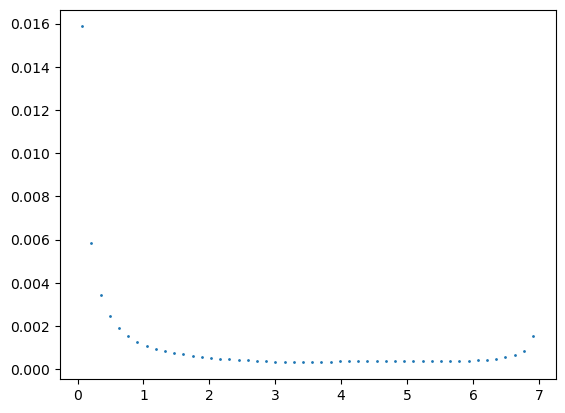

In [11]:
plt.scatter(bin_centers, np.sqrt(binned_ps_variance), s=1)

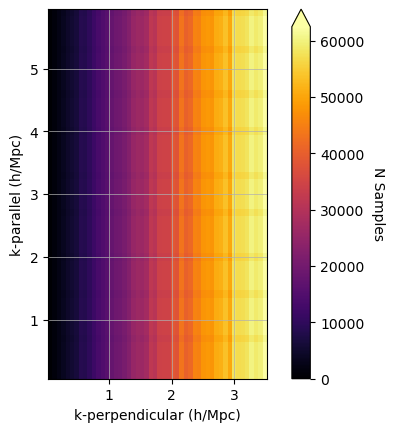

In [12]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    nsamples_2d.T,
    origin="lower",
    interpolation="none",
    extent=[np.min(bin_centers_kperp), np.max(bin_centers_kperp), np.min(bin_centers_kpar), np.max(bin_centers_kpar)],
    vmin=0,
    cmap=use_cmap,
)
ax.set_xlabel("k-perpendicular (h/Mpc)")
ax.set_ylabel("k-parallel (h/Mpc)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("N Samples", rotation=270, labelpad=15)
plt.show()

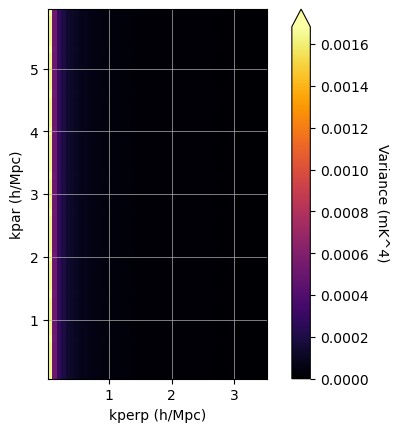

In [13]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    binned_ps_variance_2d.T,
    origin="lower",
    interpolation="none",
    extent=[np.min(bin_centers_kperp), np.max(bin_centers_kperp), np.min(bin_centers_kpar), np.max(bin_centers_kpar)],
    vmin=0,
    cmap=use_cmap,
)
ax.set_xlabel("kperp (h/Mpc)")
ax.set_ylabel("kpar (h/Mpc)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("Variance (mK^4)", rotation=270, labelpad=15)
plt.show()

In [14]:
all_sky_size_sr = 3 * np.pi
all_sky_size_deg2 = all_sky_size_sr * (180/np.pi)**2.
field_of_view_deg2 = 10.6
n_fields = all_sky_size_deg2 / field_of_view_deg2

In [15]:
print(n_fields)

2918.8415978362696


In [16]:
# Total observing days
15*n_fields/60./24.

30.404599977461142

In [17]:
# Total observing seconds
15*n_fields*60.

2626957.4380526426

In [18]:
# Figure out what uv extent is needed
print(np.max(bin_centers_kperp))
kx_test, ky_test, kz_test = dsa2000_sensitivity.uvf_to_cosmology_axis_transform(
    np.array([4000]),
    np.array([4000]),
    np.array([min_freq_hz]),
    freq_resolution_hz,
)
print(kx_test)

3.5214334658742126


NameError: name 'min_freq_hz' is not defined

In [ ]:
c = 3e8
field_of_view_deg2 = 10.6
min_freq_hz = 0.7e9
max_freq_hz = c / 0.21
freq_resolution_hz = 162.5e3
uv_extent = 4000

sample_variance_cube, bin_centers_sample_variance, binned_ps_sample_variance = dsa2000_sensitivity.get_sample_variance(
    power_new,  # Units mK^2
    k,  # Units h/Mpc
    uv_extent=uv_extent,
    field_of_view_deg2=field_of_view_deg2,
    min_freq_hz=min_freq_hz,
    max_freq_hz=max_freq_hz,
    freq_resolution_hz=freq_resolution_hz,
    k_bin_size=bin_centers[1]-bin_centers[0],
    k_bin_centers=bin_centers
)

In [ ]:
plt.scatter(bin_centers_sample_variance, np.sqrt(binned_ps_sample_variance), s=1)

In [ ]:
combined_variance = binned_ps_sample_variance + binned_ps_variance
plt.scatter(bin_centers, np.sqrt(binned_ps_variance), s=1)
plt.scatter(bin_centers, np.sqrt(binned_ps_sample_variance), s=1)
plt.scatter(bin_centers, np.sqrt(combined_variance), s=1)

In [ ]:
plt.plot(k, power_new, label="Predicted Signal")
plt.plot(bin_centers, np.sqrt(combined_variance), "--", label="Noise - 1 field", color="orange")
plt.plot(bin_centers, np.sqrt(combined_variance/n_fields), "--", label="Noise - all sky", color="red")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim([np.min(bin_centers),np.max(k)])
plt.ylabel("Power Spectrum (mK$^2$)")
plt.xlabel("k (h/Mpc)")
plt.ylim(1e-5,1e-1)

In [ ]:
plt.plot(k, power_new, label="Predicted Signal")
plt.plot(bin_centers, np.sqrt(combined_variance), "--", label="Noise - 1 field", color="orange")
plt.plot(bin_centers, np.sqrt(combined_variance/n_fields), "--", label="Noise - all sky", color="red")
plt.plot(bin_centers, np.sqrt(binned_ps_variance), "-", label="Thermal Noise - 1 field", color="orange", linewidth=.5)
plt.plot(bin_centers, np.sqrt(binned_ps_variance/n_fields), "-", label="Thermal Noise - all sky", color="red", linewidth=.5)
plt.plot(bin_centers, np.sqrt(binned_ps_sample_variance), "-.", label="Sampling Noise - 1 field", color="orange", linewidth=.5)
plt.plot(bin_centers, np.sqrt(binned_ps_sample_variance/n_fields), "-.", label="Sampling Noise - all sky", color="red", linewidth=.5)
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim([np.min(bin_centers),np.max(k)])
plt.ylabel("Power Spectrum (mK$^2$)")
plt.xlabel("k (h/Mpc)")
plt.ylim(1e-5,1e-1)

In [ ]:
ps_model_interp = np.interp(bin_centers, k, power_new)

In [ ]:
plt.plot(bin_centers, ps_model_interp/np.sqrt(combined_variance), "-", label="1 field", color="orange")
plt.plot(bin_centers, ps_model_interp/np.sqrt(combined_variance/n_fields), "-", label="all sky", color="red")
plt.plot([np.min(bin_centers), np.max(bin_centers)], [1,1], "--", color="grey", linewidth=0.5)
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim([np.min(bin_centers),np.max(k)])
plt.ylabel("SNR")
plt.xlabel("k (h/Mpc)")

In [ ]:
nsamples_offzenith, bin_centers, binned_ps_variance_offzenith, nsamples_2d_offzenith, bin_centers_kperp, bin_centers_kpar, binned_ps_variance_2d_offzenith = dsa2000_sensitivity.delay_ps_sensitivity_analysis(zenith_angle=60.)

In [ ]:
plt.scatter(bin_centers, np.sqrt(binned_ps_variance_offzenith/n_fields), s=1, label="off zenith")
plt.scatter(bin_centers, np.sqrt(binned_ps_variance/n_fields), s=1, label="zenith")
plt.xlim([np.min(bin_centers-1e-2),np.max(k)])
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-5,1e-1)
plt.legend()

In [ ]:
combined_variance_offzenith = binned_ps_variance_offzenith+binned_ps_sample_variance
plt.plot(k, power_new, label="Predicted Signal")
plt.plot(bin_centers, np.sqrt(combined_variance/n_fields), "--", label="Noise - zenith", color="red")
plt.plot(bin_centers, np.sqrt(combined_variance_offzenith/n_fields), "-.", label="Noise - off zenith", color="red")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim([np.min(bin_centers),np.max(k)])
plt.ylabel("Power Spectrum (mK$^2$)")
plt.xlabel("k (h/Mpc)")
plt.ylim(1e-5,1e-1)

In [ ]:
plt.plot(bin_centers, ps_model_interp/np.sqrt(combined_variance_offzenith), "-", label="1 field", color="orange")
plt.plot(bin_centers, ps_model_interp/np.sqrt(combined_variance_offzenith/n_fields), "-", label="all sky", color="red")
plt.plot([np.min(bin_centers), np.max(bin_centers)], [1,1], "--", color="grey", linewidth=0.5)
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim([np.min(bin_centers),np.max(k)])
plt.ylabel("SNR")
plt.xlabel("k (h/Mpc)")